# Importing Packages

In [ ]:
#Imported packages 
import numpy as np
import pandas as pd
import itertools
import copy

import random
random.seed(0)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

from statistics import mean

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

from math import log2, sqrt, isnan
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import make_scorer
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers
from keras import backend as K
from keras import callbacks

from sklearn.impute import KNNImputer
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

!pip3 install ann_visualizer
from ann_visualizer.visualize import ann_viz
from graphviz import Source

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp37-none-any.whl size=4168 sha256=c606f2b3b092cfef4611bc8aacd4616b5ea49fc2ef09a19abfbaaf9f7f1fc90d
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive')

Mounted at /content/drive


In [ ]:
class style:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

Reading in the Data

In [ ]:
data = pd.read_csv('all_df.csv')

# Data Quality Check

In [ ]:
data.describe()

,rank,score,log_gdp_per_capita,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,year
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000
mean,77.953875,5.413460,0.917775,0.611090,0.430544,0.127659,0.208883,2017.968635
std,44.766298,1.118595,0.402909,0.248616,0.152699,0.108081,0.117375,1.995594
min,1.000000,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,39.000000,4.571000,0.613438,0.436887,0.329800,0.055000,0.122397,2016.000000
50%,78.000000,5.385150,0.982214,0.643840,0.448940,0.093000,0.195977,2018.000000
75%,117.000000,6.216125,1.238750,0.799323,0.552335,0.161142,0.265933,2020.000000
max,158.000000,7.842000,2.096000,1.141000,0.724000,0.551910,0.838075,2021.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rank                       1084 non-null   float64
 1   score                      1084 non-null   float64
 2   region                     1084 non-null   object 
 3   country                    1084 non-null   object 
 4   log_gdp_per_capita         1084 non-null   float64
 5   healthy_life_expectancy    1084 non-null   float64
 6   freedom                    1084 non-null   float64
 7   perceptions_of_corruption  1084 non-null   float64
 8   generosity                 1084 non-null   float64
 9   year                       1084 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 84.8+ KB


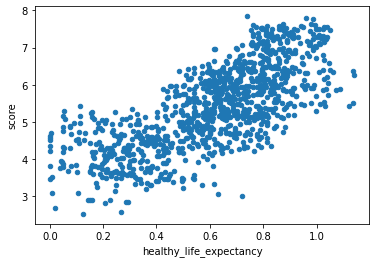

In [ ]:
data.plot.scatter(x= 'healthy_life_expectancy', y='score')

<Figure size 1440x1440 with 0 Axes>

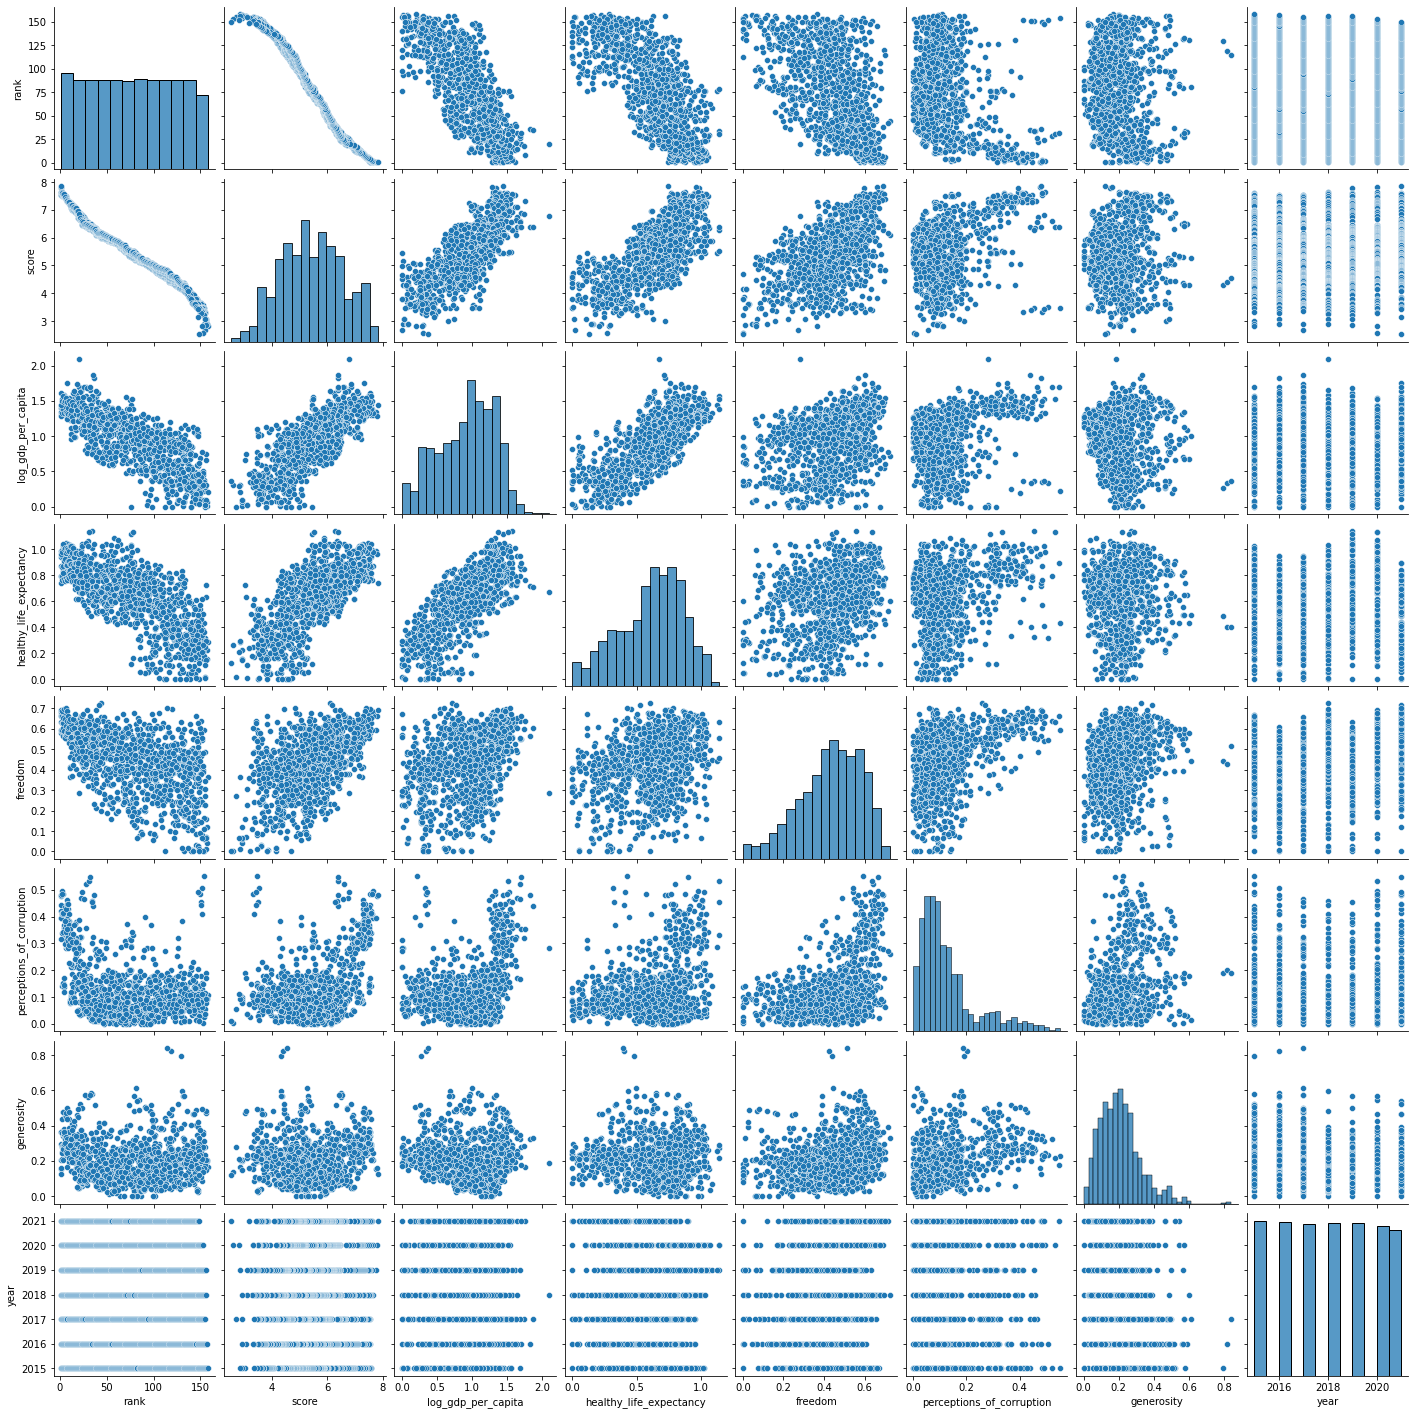

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(data)

Positive correlation with score:
- freedom (weakest)
- life expectancy (medium)
- log gdp per capita (highest)

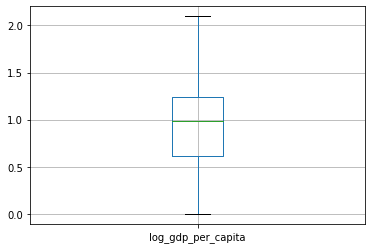

In [ ]:
data.boxplot(column = 'log_gdp_per_capita')

In [ ]:
data.isnull().sum()

rank                         0
log_gdp_per_capita           0
healthy_life_expectancy      0
freedom                      0
perceptions_of_corruption    0
generosity                   0
dtype: int64

In [ ]:
data.head()

,rank,score,region,country,log_gdp_per_capita,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity,year
0,1.0,7.587,Western Europe,Switzerland,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,2.0,7.561,Western Europe,Iceland,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,3.0,7.527,Western Europe,Denmark,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,4.0,7.522,Western Europe,Norway,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,5.0,7.427,North America,Canada,1.32629,0.90563,0.63297,0.32957,0.45811,2015


# Data Preparation

In [ ]:
#drop the country,region,rank and year columns
data.drop(columns= ['country','region','year','rank'], axis = 1, inplace = True)

In [ ]:
#Correlation with target (rank)
data.corr()['score']

score                        1.000000
log_gdp_per_capita           0.785453
healthy_life_expectancy      0.732209
freedom                      0.560390
perceptions_of_corruption    0.405940
generosity                   0.103570
Name: score, dtype: float64

All except generosity appear to have significant correlation with the target

- unusual that corruption positively correlated with score, does this mean that in high scoring coutnries there is still a lot of percieved corruption?

# Train Test Split

In [ ]:
#Creating X and y
X = data.iloc[:,1:]
y = data.iloc[:, 0]
X.head()

,log_gdp_per_capita,healthy_life_expectancy,freedom,perceptions_of_corruption,generosity
0,1.39651,0.94143,0.66557,0.41978,0.29678
1,1.30232,0.94784,0.62877,0.14145,0.43630
2,1.32548,0.87464,0.64938,0.48357,0.34139
3,1.45900,0.88521,0.66973,0.36503,0.34699
4,1.32629,0.90563,0.63297,0.32957,0.45811


In [ ]:
#Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

# Linear Regression

In [ ]:
#Scale the features by normalization becuase they do not follow a gaussian distribution
scaler = Normalizer().fit(X_train) 
#Scaling train feature data
lr_X_train = scaler.transform(X_train) 
#Scaling the test feature data
lr_X_test = scaler.transform(X_test)

## Standard

Normalised

In [ ]:
#Creating a model object and fitting
lr_model = LinearRegression().fit(lr_X_train, y_train)
#Creating prediction object for test
y_pred = lr_model.predict(lr_X_test)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred)
print(style.BOLD + f'Standard linear regression R2 = {r2}' + style.END)
#Creating object for the linear coefficients for each feature
coef = lr_model.coef_
print(style.BOLD + 'Standard linear regression coefficients' + style.END)
#Printing list of column names and their coefficients
j = 0
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1

Standard linear regression R2 = 0.21574955400809248
Standard linear regression coefficients
log_gdp_per_capita : 4.8542711014140165
healthy_life_expectancy : 3.0213773437447955
freedom : 1.8900554364186983
perceptions_of_corruption : 3.8218404668272536
generosity : -0.8956189847153948


Try linear regression without normalization or standardization

No scaling

In [ ]:
#No Feature scaling

#Creating a model object and fitting
lr_model = LinearRegression().fit(X_train, y_train)
#Creating prediction object for test
y_pred = lr_model.predict(X_test)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred)
print(style.BOLD + f'Standard linear regression R2 = {r2}' + style.END)
#Creating object for the linear coefficients for each feature
coef = lr_model.coef_
print(style.BOLD + 'Standard linear regression coefficients' + style.END)
#Printing list of column names and their coefficients
j = 0
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1

Standard linear regression R2 = 0.6587892231694159
Standard linear regression coefficients
log_gdp_per_capita : 1.2941707360872834
healthy_life_expectancy : 1.2325947674376445
freedom : 1.9400023609571126
perceptions_of_corruption : 0.7466997151715069
generosity : 0.5495253420968339


Try linear regression with standardization

Standardised

In [ ]:
#Standardization feature scaling
scaler = StandardScaler().fit(X_train) 
stan_X_train = scaler.transform(X_train) 
stan_X_test = scaler.transform(X_test)

In [ ]:
#No Feature scaling
#Creating a model object and fitting
lr_model = LinearRegression().fit(stan_X_train, y_train)
#Creating prediction object for test
y_pred = lr_model.predict(stan_X_test)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred)
print(style.BOLD + f'Standard linear regression R2 = {r2}' + style.END)
#Creating object for the linear coefficients for each feature
coef = lr_model.coef_
print(style.BOLD + 'Standard linear regression coefficients' + style.END)
#Printing list of column names and their coefficients
j = 0
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1

Standard linear regression R2 = 0.6587892231694157
Standard linear regression coefficients
log_gdp_per_capita : 0.5244018704271192
healthy_life_expectancy : 0.3076357789699488
freedom : 0.2960486735330064
perceptions_of_corruption : 0.08103889721148838
generosity : 0.06279819216359628


- No feature scaling and standardisaton gave significantly better r2 results.
- No feature scaling by a tiny margin gived better reults than standardisation



## Ridge (Normalised)

In [ ]:
#Creating a model object and fitting
ridge = Ridge().fit(lr_X_train, y_train)
#Creating prediction object for test
y_pred = ridge.predict(lr_X_test)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred)
#Creating object for the linear coefficients for each feature
print(style.BOLD + f'Ridge regression R2 = {r2}' + style.END)
coef = lr_model.coef_
print(style.BOLD + 'Ridge regression coefficients' + style.END)
#Printing list of column names and their coefficients
j = 0; 
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1

Ridge regression R2 = 0.23015320894230074
Ridge regression coefficients
log_gdp_per_capita : 4.8542711014140165
healthy_life_expectancy : 3.0213773437447955
freedom : 1.8900554364186983
perceptions_of_corruption : 3.8218404668272536
generosity : -0.8956189847153948


Ridge results slightly better than standard linear regression, but r2 score can be improved by hypertuning

In [ ]:
#Hypertuning ridge using sklearn RidgeCV
#Round 1
ridge= RidgeCV(alphas = [0.1, 1, 10, 100, 500, 1000, 10000]).fit(lr_X_train, y_train) 
print(f'Best alpha: Round 1 = {ridge.alpha_}')

Best alpha = 0.1


In [ ]:
# Round 2
#Starting from 0.001, ending at 0.1, in steps of 0.0001
ridge= RidgeCV(alphas = np.arange(0.001,0.1, 0.0001)).fit(lr_X_train, y_train) 
print(f'Best alpha: Round 2 = {ridge.alpha_}')

Best alpha: Round 2 = 0.09990000000000004


Choosing best alpha = 0.09990000000000004

In [ ]:
#Final Hypertuned ridge regression

#Creating a model object and fitting
ridge = Ridge(alpha=0.09990000000000004).fit(lr_X_train, y_train)
#Creating prediction object for test
y_pred = ridge.predict(lr_X_test)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred)
#Creating object for the linear coefficients for each feature
print(style.BOLD + f'Ridge regression R2 = {r2}' + style.END)
coef = lr_model.coef_
print(style.BOLD + 'Ridge regression coefficients' + style.END)
#Printing list of column names and their coefficients
j = 0; 
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1

Ridge regression R2 = 0.21877590141618386
Ridge regression coefficients
log_gdp_per_capita : 4.8542711014140165
healthy_life_expectancy : 3.0213773437447955
freedom : 1.8900554364186983
perceptions_of_corruption : 3.8218404668272536
generosity : -0.8956189847153948


alpha=0.1 hypertuning better than standard lr but r2 worse than when alpha=1

## Ridge (No Scaling)

In [ ]:
#Creating a model object and fitting
ridge = Ridge().fit(stan_X_train, y_train)
#Creating prediction object for test and train
y_pred_test = ridge.predict(stan_X_test)
y_pred_train=ridge.predict(stan_X_train)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred)
#Creating object for the linear coefficients for each feature
print(style.BOLD + f'Ridge regression R2 = {r2}' + style.END)
coef = lr_model.coef_
print(style.BOLD + 'Ridge regression coefficients' + style.END)
#Printing list of column names and their coefficients
j = 0; 
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1

print(f'mean squared error train(MSE): {mean_squared_error(y_train,y_pred_train)}')
print(f'mean squared error test (MSE): {mean_squared_error(y_test,y_pred_test)}')

print(f'root mean squared error train (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')
print(f'root mean squared error test (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')

Ridge regression R2 = 0.6587960793638352
Ridge regression coefficients
log_gdp_per_capita : 4.8542711014140165
healthy_life_expectancy : 3.0213773437447955
freedom : 1.8900554364186983
perceptions_of_corruption : 3.8218404668272536
generosity : -0.8956189847153948
mean squared error train(MSE): 0.3119531112098801
mean squared error test (MSE): 0.38160664664872995
root mean squared error train (RMSE): 0.5585276279736573
root mean squared error test (RMSE): 0.5585276279736573


In [ ]:
#Hypertuning ridge using sklearn RidgeCV
#Round 1
ridge= RidgeCV(alphas = [0.1, 1, 10, 100, 500, 1000, 10000]).fit(stan_X_train, y_train) 
print(f'Best alpha: Round 1 = {ridge.alpha_}')

Best alpha: Round 1 = 10.0


In [ ]:
# Round 2
#Starting from 0.001, ending at 0.1, in steps of 0.0001
ridge= RidgeCV(alphas = np.arange(1,100, 0.05)).fit(stan_X_train, y_train) 
print(f'Best alpha: Round 2 = {ridge.alpha_}')

Best alpha: Round 2 = 9.500000000000007


In [ ]:
# Round 3
#Starting from 0.001, ending at 0.1, in steps of 0.0001
ridge= RidgeCV(alphas = np.arange(9,10, 0.00001)).fit(stan_X_train, y_train) 
print(f'Best alpha: Round 3 = {ridge.alpha_}')

Best alpha: Round 2 = 9.51902999998035


Choosing best alpha = 9.51902999998035

In [ ]:
#Final Hypertuned ridge regression

#Creating a model object and fitting
ridge = Ridge(alpha=9.51902999998035).fit(stan_X_train, y_train)
#Creating prediction object for test and train
y_pred_test = ridge.predict(stan_X_test)
y_pred_train = ridge.predict(stan_X_train)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred)
#Creating object for the linear coefficients for each feature
print(style.BOLD + f'Ridge regression R2 = {r2}' + style.END)
coef = lr_model.coef_
print(style.BOLD + 'Ridge regression coefficients' + style.END)
#Printing list of column names and their coefficients
j = 0; 
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1

print(f'mean squared error train(MSE): {mean_squared_error(y_train,y_pred_train)}')
print(f'mean squared error test (MSE): {mean_squared_error(y_test,y_pred_test)}')

print(f'root mean squared error train (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')
print(f'root mean squared error test (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')

Ridge regression R2 = 0.6587960793638352
Ridge regression coefficients
log_gdp_per_capita : 4.8542711014140165
healthy_life_expectancy : 3.0213773437447955
freedom : 1.8900554364186983
perceptions_of_corruption : 3.8218404668272536
generosity : -0.8956189847153948
mean squared error train(MSE): 0.3119932303771247
mean squared error test (MSE): 0.38156275379305093
root mean squared error train (RMSE): 0.5585635419333459
root mean squared error test (RMSE): 0.5585635419333459


## Lasso (Normalised)

In [ ]:
#Creating a model object and fitting
lasso = Lasso().fit(lr_X_train, y_train)
#Creating prediction object for test
y_pred = lasso.predict(lr_X_test)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred)
#Creating object for the linear coefficients for each feature
print(style.BOLD + f'Lasso linear regression R2 = {r2}' + style.END)
coef = lr_model.coef_
print(style.BOLD + 'Lasso linear regression coefficients' + style.END)
#Printing list of column names and their coefficients
j = 0; 
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1

Lasso linear regression R2 = -0.006688009112529203
Lasso linear regression coefficients
log_gdp_per_capita : 4.8542711014140165
healthy_life_expectancy : 3.0213773437447955
freedom : 1.8900554364186983
perceptions_of_corruption : 3.8218404668272536
generosity : -0.8956189847153948


In [ ]:
#Hypertuning lasso using sklearn lassoCV
#Round 1
lasso = LassoCV(alphas = [0.1, 1, 10, 100, 1000, 10000]).fit(lr_X_train, y_train) 
print(f'Best alpha: Round 1 = {lasso.alpha_}')

Best alpha: Round 1 = 10000.0


In [ ]:
#Round 2
lasso = LassoCV(alphas = np.arange(1000, 10000, 1)).fit(lr_X_train, y_train) 
print(f'Best alpha: Round 2 = {lasso.alpha_}')

Best alpha: Round 2 = 9999


Choosing best alpha = 9999

In [ ]:
#Creating a model object and fitting
lasso = Lasso(alpha = 9999).fit(lr_X_train, y_train)
#Creating prediction object for test
y_pred = lasso.predict(lr_X_test)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred)
#Creating object for the linear coefficients for each feature
print(style.BOLD + f'Lasso linear regression R2 = {r2}' + style.END)
coef = lr_model.coef_
print(style.BOLD + 'Lasso linear regression coefficients' + style.END)
#Printing list of column names and their coefficients
j = 0; 
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1

Lasso linear regression R2 = -0.006688009112529203
Lasso linear regression coefficients
log_gdp_per_capita : 4.8542711014140165
healthy_life_expectancy : 3.0213773437447955
freedom : 1.8900554364186983
perceptions_of_corruption : 3.8218404668272536
generosity : -0.8956189847153948


Lasso with hypertuning had no effect on the r2 or coefficients

## Lasso (No Scaling)

In [ ]:
#Creating a model object and fitting
lasso = Lasso().fit(stan_X_train, y_train)
#Creating prediction object for test
y_pred_test = lasso.predict(stan_X_test)
y_pred_train = lasso.predict(stan_X_train)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred)
#Creating object for the linear coefficients for each feature
print(style.BOLD + f'Lasso linear regression R2 = {r2}' + style.END)
coef = lr_model.coef_
print(style.BOLD + 'Lasso linear regression coefficients' + style.END)
#Printing list of column names and their coefficients
j = 0; 
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1
print(f'mean squared error train(MSE): {mean_squared_error(y_train,y_pred_train)}')
print(f'mean squared error test (MSE): {mean_squared_error(y_test,y_pred_test)}')

print(f'root mean squared error train (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')
print(f'root mean squared error test (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')

Lasso linear regression R2 = 0.6587960793638352
Lasso linear regression coefficients
log_gdp_per_capita : 4.8542711014140165
healthy_life_expectancy : 3.0213773437447955
freedom : 1.8900554364186983
perceptions_of_corruption : 3.8218404668272536
generosity : -0.8956189847153948
mean squared error train(MSE): 1.281562653904418
mean squared error test (MSE): 1.1258922074009743
root mean squared error train (RMSE): 1.1320612412340678
root mean squared error test (RMSE): 1.1320612412340678


Lasso still giving poor results so will not continue with hypertuning

## PCA (Normalised)

In [ ]:
#Split the training data into test and validation data,
pca_X_train, pca_X_val, pca_y_train, pca_y_val = train_test_split(lr_X_train, y_train, test_size = 0.2, random_state = 17)

In [ ]:
r2_chosen = 0
#iterate from 1 through 5 in steps of 1(number of features)
for i in np.arange(1, 5, 1).tolist():
  pca = PCA(n_components=i)
  pca_model = pca.fit(pca_X_train)
  pc = pca_model.transform(pca_X_train)
  pca_reg = LinearRegression().fit(pc, pca_y_train)
  val_pc = pca.transform(pca_X_val)
  y_pred = pca_reg.predict(val_pc)
  r2 = r2_score(pca_y_val, y_pred)
  # choosing the feature count with the maximum r2 
  if r2 > r2_chosen:
    features_count = i
    r2_chosen = r2
# Print the best performing count number of features
print(f'PC count = {features_count}')

PC count = 4


In [ ]:
#Creating a model object and fitting
lasso = Lasso().fit(stan_X_train, y_train)
#Creating prediction object for test
y_pred_test = lasso.predict(stan_X_test)
y_pred_train = lasso.predict(stan_X_train)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred)
#Creating object for the linear coefficients for each feature
print(style.BOLD + f'Lasso linear regression R2 = {r2}' + style.END)
coef = lr_model.coef_
print(style.BOLD + 'Lasso linear regression coefficients' + style.END)
#Printing list of column names and their coefficients
j = 0; 
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1
print(f'mean squared error train(MSE): {mean_squared_error(y_train,y_pred_train)}')
print(f'mean squared error test (MSE): {mean_squared_error(y_test,y_pred_test)}')

print(f'root mean squared error train (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')
print(f'root mean squared error test (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')

In [ ]:
#Apply PCA on the test data.
pca = PCA(n_components=4)
pca_model = pca.fit(pca_X_train)
pc = pca_model.transform(pca_X_train)

pca_reg = LinearRegression().fit(pc, pca_y_train)
val_pc = pca.transform(pca_X_val)
val_pc_train = pca.transform(pca_X_train)

#Generating predictions
y_pred_test = pca_reg.predict(val_pc)
y_pred_train = pca_reg.predict(val_pc_train)


r2 = r2_score(pca_y_val,y_pred_test)
print(f'PCA linear regression R2 = {r2}')

print(f'mean squared error train(MSE): {mean_squared_error(pca_y_train,y_pred_train)}')
print(f'mean squared error test (MSE): {mean_squared_error(pca_y_val,y_pred_test)}')

print(f'root mean squared error train (RMSE): {(mean_squared_error(pca_y_train,y_pred_train)**0.5)}')
print(f'root mean squared error test (RMSE): {(mean_squared_error(pca_y_val,y_pred_test)**0.5)}')

PCA linear regression R2 = 0.24859802436678025
mean squared error train(MSE): 0.9374382048496227
mean squared error test (MSE): 0.8961731690920436
root mean squared error train (RMSE): 0.9682139251475486
root mean squared error test (RMSE): 0.9466642324985367


## PCA (No Scaling)

In [ ]:
#Split the training data into test and validation data,
stan_pca_X_train, stan_pca_X_val, stan_pca_y_train, stan_pca_y_val = train_test_split(stan_X_train, y_train, test_size = 0.2, random_state = 17)

In [ ]:
r2_chosen = 0
#iterate from 1 through 5 in steps of 1(number of features)
for i in np.arange(1, 5, 1).tolist():
  pca = PCA(n_components=i)
  pca_model = pca.fit(stan_pca_X_train)
  pc = pca_model.transform(stan_pca_X_train)
  pca_reg = LinearRegression().fit(pc, stan_pca_y_train)
  val_pc = pca.transform(stan_pca_X_val)
  y_pred = pca_reg.predict(val_pc)
  r2 = r2_score(stan_pca_y_val, y_pred)
  # choosing the feature count with the maximum r2 
  if r2 > r2_chosen:
    features_count = i
    r2_chosen = r2
# Print the best performing count number of features
print(f'PC count = {features_count}')

PC count = 4


In [ ]:
#Apply PCA on the test data.
pca = PCA(n_components=4)
pca_model = pca.fit(stan_pca_X_train)
pc = pca_model.transform(stan_pca_X_train)

pca_reg = LinearRegression().fit(pc, stan_pca_y_train)
test_pc = pca.transform(stan_pca_X_val)
val_pc_train = pca.transform(stan_pca_X_train)

#Generating predictions
y_pred_test = pca_reg.predict(test_pc)
y_pred_train = pca_reg.predict(val_pc_train)


r2 = r2_score(stan_pca_y_val,y_pred_test)
print(f'PCA linear regression R2 = {r2}')

j = 0
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1

print(f'mean squared error train(MSE): {mean_squared_error(stan_pca_y_train,y_pred_train)}')
print(f'mean squared error test (MSE): {mean_squared_error(stan_pca_y_val,y_pred_test)}')

print(f'root mean squared error train (RMSE): {(mean_squared_error(stan_pca_y_train,y_pred_train)**0.5)}')
print(f'root mean squared error test (RMSE): {(mean_squared_error(stan_pca_y_val,y_pred_test)**0.5)}')

PCA linear regression R2 = 0.7447358893686382
log_gdp_per_capita : 4.8542711014140165
healthy_life_expectancy : 3.0213773437447955
freedom : 1.8900554364186983
perceptions_of_corruption : 3.8218404668272536
generosity : -0.8956189847153948
mean squared error train(MSE): 0.3219927052939647
mean squared error test (MSE): 0.3044453626664858
root mean squared error train (RMSE): 0.5674440107129202
root mean squared error test (RMSE): 0.5517656773182669


## RFE

In [ ]:
model = LinearRegression()
rfe = RFE(estimator= model, n_features_to_select=4)
rfe = rfe.fit(stan_X_train, y_train)

s1 = stan_X_train.T
s2 = stan_X_test.T
s1 = s1[rfe.support_]
s2 = s2[rfe.support_]
RFE_stan_X_train = s1.T
RFE_stan_X_test = s2.T
reg = LinearRegression()
reg.fit(RFE_stan_X_train,y_train)

y_pred_test = reg.predict(RFE_stan_X_test)
y_pred_train = reg.predict(RFE_stan_X_train)


r2 = r2_score(y_test, y_pred)
print(style.BOLD + f'Linear regression with 4 main features R2 = {r2}' + style.END)
print(style.BOLD + 'Selected 4 features: '+ style.END)

j = 0
for col in X.columns:
  print(f'{col} : {coef[j]}')
  j = j + 1

print(style.BOLD + f'RFE linear regression coefficients : {reg.coef_}'+ style.END)

print(f'mean squared error train(MSE): {mean_squared_error(y_train,y_pred_train)}')
print(f'mean squared error test (MSE): {mean_squared_error(y_test,y_pred_test)}')

print(f'root mean squared error train (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')
print(f'root mean squared error test (RMSE): {(mean_squared_error(y_test,y_pred_test)**0.5)}')

Linear regression with 4 main features R2 = 0.6567180295576214
Selected 4 features: 
log_gdp_per_capita : 4.8542711014140165
healthy_life_expectancy : 3.0213773437447955
freedom : 1.8900554364186983
perceptions_of_corruption : 3.8218404668272536
generosity : -0.8956189847153948
RFE linear regression coefficients : [0.50954838 0.30975184 0.30558795 0.10221457]
mean squared error train(MSE): 0.31529289372772684
mean squared error test (MSE): 0.38393076302066315
root mean squared error train (RMSE): 0.5615094778609947
root mean squared error test (RMSE): 0.6196214675272824


## Linear Regression Models Evaluation
- Best Performing: No scaling, PCA Regression (R2=0.7447358893686382)
  - No scaling standard linear regression also performed well
- Worst Performing: All Lasso models
- Most important features from most to least:
  - log_gdp_per_capita : 4.8542711014140165
  - healthy_life_expectancy : 3.0213773437447955
  - freedom : 1.8900554364186983
  - perceptions_of_corruption : 3.8218404668272536
  - generosity : -0.8956189847153948

# Neural Networks

In [ ]:
# Scale data using MinMax scaler
min_max_scaler = preprocessing.MinMaxScaler()
MinMax_X_train = min_max_scaler.fit_transform(X_train)
MinMax_X_test = min_max_scaler.fit_transform(X_test)

In [ ]:
#Creating a validation train test split
NN_X_train, NN_X_val, NN_y_train, NN_y_val = train_test_split(MinMax_X_train, y_train, test_size = 0.2, random_state = 17)

## Functions

In [ ]:
#R2 Metric dunction to evaluate NN Model
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
def fit_n_times(architecture, opt, n):
  All_Models = []
  all_histories = []
  i = 0
  while i < n:
     arch = copy.deepcopy(architecture)

     model = Sequential(arch)

     model.compile(optimizer = opt, loss= 'mse',
                   metrics = [r_squared])
     
     es = callbacks.EarlyStopping(monitor='val_r_squared', 
                                        mode='max', patience=20, verbose = 1,  min_delta=0.01)

     hist = model.fit(NN_X_train, NN_y_train,
          batch_size=32,epochs=300,
          validation_data=(NN_X_val, NN_y_val), verbose = 0, shuffle = False, callbacks=[es])
     r2_train = hist.history['r_squared'][-1]
     r2_val = hist.history['val_r_squared'][-1]
     if (r2_train < -1 or r2_train > 1 or r2_val < -1 or r2_val > 1 or isnan(r2_train)): 
        print("Invalid intialization. Reinitializing...\n")
        continue
     all_histories.append(hist)
     print("Trial ", i+1)
     print("Train R2 =", hist.history['r_squared'][-1], 
           ", Validation R2 =", hist.history['val_r_squared'][-1],
           ", Test R2 =", r2_score(y_test, model.predict(MinMax_X_test)), "\n")
     All_Models.append(model)
     i+=1

  avg_r2_train = mean([hist.history['r_squared'][-1] for hist in all_histories])
  avg_r2_val = mean([hist.history['val_r_squared'][-1] for hist in all_histories])
  avg_r2_test = mean([r2_score(y_test, All_Models[j].predict(MinMax_X_test)) for j in range(n)])  
  best_model = max(All_Models, key = lambda mod: r2_score(y_test, mod.predict(MinMax_X_test)))

  print("Average Train R2 =", avg_r2_train)
  print("Average Validation R2 =", avg_r2_val)
  print("Average Test R2 =", avg_r2_test)
  print()
  print("Best Model Test R2 =", r2_score(y_test, best_model.predict(MinMax_X_test)), "\n")
  return best_model, avg_r2_test

In [ ]:
def optimize_architecture(architecture):
  optimizers = ['RMSprop', 'sgd', 'adam']
  scores = []
  best_models = []
  for optimizer in optimizers:
    print("Fitting using", optimizer, "optimizer...\n")
    best_model, avg_score = fit_n_times(architecture, optimizer, 10)
    scores.append(avg_score)
    best_models.append(best_model)
    print(optimizer, "score =", avg_score)
    print("---------------------------------------------------------------------\n")
  max_score = max(scores)
  max_model_index = scores.index(max_score)
  print("Best optimizer is", optimizers[max_model_index], "with avg test R2 =", max_score)
  best_r2 = r2_score(y_test, best_models[max_model_index].predict(MinMax_X_test))
  print("The best model found using it has a test R2 =", best_r2)
  return best_models[max_model_index]

## Single Neuron

In [ ]:
#One neuron and no activation
arch = [ 
        Dense(1, input_shape=(5,)),
       ]

Single_Neuron_NoActivation = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00145: early stopping
Trial  1
Train R2 = 0.7118380069732666 , Validation R2 = 0.6883737444877625 , Test R2 = 0.548594405118285 

Epoch 00191: early stopping
Trial  2
Train R2 = 0.7389848828315735 , Validation R2 = 0.6965648531913757 , Test R2 = 0.5588410150561779 

Epoch 00201: early stopping
Trial  3
Train R2 = 0.7290911078453064 , Validation R2 = 0.6992005705833435 , Test R2 = 0.5530595895329593 

Epoch 00197: early stopping
Trial  4
Train R2 = 0.7379003167152405 , Validation R2 = 0.695235550403595 , Test R2 = 0.5599053648963205 

Epoch 00186: early stopping
Trial  5
Train R2 = 0.7237500548362732 , Validation R2 = 0.6918878555297852 , Test R2 = 0.5620685792592537 

Epoch 00171: early stopping
Trial  6
Train R2 = 0.7272807955741882 , Validation R2 = 0.6953206658363342 , Test R2 = 0.5457954465624744 

Epoch 00156: early stopping
Trial  7
Train R2 = 0.7299772500991821 , Validation R2 = 0.6941211223602295 , Test R2 = 0.5570670554362093 

Epoch 0

- Best optimizer is sgd whose avg test R2 = 0.5906
- The best model found using it has a test R2 = 0.60626

Using the ReLu activation function

In [ ]:
arch = [ 
        Dense(1, activation = 'relu', input_shape=(5,)),
       ]

Single_Neuron_ReLu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00168: early stopping
Trial  1
Train R2 = 0.7359288930892944 , Validation R2 = 0.6932187676429749 , Test R2 = 0.5587704472517208 

Epoch 00136: early stopping
Trial  2
Train R2 = 0.7296876907348633 , Validation R2 = 0.692596971988678 , Test R2 = 0.5566293159973597 

Epoch 00156: early stopping
Trial  3
Train R2 = 0.7329860329627991 , Validation R2 = 0.6950445175170898 , Test R2 = 0.5613539734448107 

Epoch 00170: early stopping
Trial  4
Train R2 = 0.7220475077629089 , Validation R2 = 0.6970853209495544 , Test R2 = 0.551186270843997 

Epoch 00171: early stopping
Trial  5
Train R2 = 0.7279413342475891 , Validation R2 = 0.6955634951591492 , Test R2 = 0.5530268242827776 

Epoch 00197: early stopping
Trial  6
Train R2 = 0.7253839373588562 , Validation R2 = 0.6952529549598694 , Test R2 = 0.570411113702586 

Epoch 00021: early stopping
Invalid intialization. Reinitializing...

Epoch 00192: early stopping
Trial  7
Train R2 = 0.7184746265411377 , Valida

- Best optimizer is sgd whose avg test R2 = 0.58458
- The best model found using it has a test R2 = 0.60516
- Using ReLu gave slightly weaker results

## 3 Layer Neural Network

### ReLu

In [ ]:
#1 input layer
#1 hidden layer
#1 output layer

#Using ReLu activation for all
arch = [
      Dense(9, activation='relu', input_shape=(5,)),
      Dense(5, activation='relu'),
      Dense(1, activation='relu'),
]

Simple_Network_3ReLu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00054: early stopping
Trial  1
Train R2 = 0.7401005029678345 , Validation R2 = 0.7060076594352722 , Test R2 = 0.5597585218896195 

Epoch 00052: early stopping
Trial  2
Train R2 = 0.7404788732528687 , Validation R2 = 0.7022790312767029 , Test R2 = 0.5546659610210205 

Epoch 00052: early stopping
Trial  3
Train R2 = 0.740563154220581 , Validation R2 = 0.6986997723579407 , Test R2 = 0.5440939493301845 

Epoch 00054: early stopping
Trial  4
Train R2 = 0.7397139072418213 , Validation R2 = 0.7015870213508606 , Test R2 = 0.5532853551825416 

Epoch 00063: early stopping
Trial  5
Train R2 = 0.7405843734741211 , Validation R2 = 0.6953840851783752 , Test R2 = 0.5436261321529796 

Epoch 00042: early stopping
Trial  6
Train R2 = 0.7340453863143921 , Validation R2 = 0.7028784155845642 , Test R2 = 0.556169408612377 

Epoch 00021: early stopping
Invalid intialization. Reinitializing...

Epoch 00021: early stopping
Invalid intialization. Reinitializing...

Epoc

ReLu activation for all layers:
Best so far
- Best optimizer is adam whose avg test R2 = 0.5891994517284519
- The best model found using it has a test R2 = 0.6128403645652591


In [ ]:
#ReLu activation for input and hidden layers only
arch = [
      Dense(9, activation='relu', input_shape=(5,)),
      Dense(5, activation='relu'),
      Dense(1),
]

Simple_Network_2ReLu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00064: early stopping
Trial  1
Train R2 = 0.73989337682724 , Validation R2 = 0.704966127872467 , Test R2 = 0.5590840968556068 

Epoch 00054: early stopping
Trial  2
Train R2 = 0.7467979192733765 , Validation R2 = 0.6937932372093201 , Test R2 = 0.5417257913489095 

Epoch 00063: early stopping
Trial  3
Train R2 = 0.7414983510971069 , Validation R2 = 0.6995904445648193 , Test R2 = 0.5522301620020024 

Epoch 00052: early stopping
Trial  4
Train R2 = 0.7434443831443787 , Validation R2 = 0.7028819918632507 , Test R2 = 0.5563053555280204 

Epoch 00082: early stopping
Trial  5
Train R2 = 0.7364675402641296 , Validation R2 = 0.7012355923652649 , Test R2 = 0.565233874853798 

Epoch 00050: early stopping
Trial  6
Train R2 = 0.7378172278404236 , Validation R2 = 0.7085466384887695 , Test R2 = 0.5659998681075338 

Epoch 00085: early stopping
Trial  7
Train R2 = 0.7297168374061584 , Validation R2 = 0.700343132019043 , Test R2 = 0.572179016363983 

Epoch 00046

In [ ]:
#ReLu activation for input and hidden layers only
arch = [
      Dense(9, activation='relu', input_shape=(5,)),
      Dense(5),
      Dense(1),
]

Simple_Network_1ReLu = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00048: early stopping
Trial  1
Train R2 = 0.7397863864898682 , Validation R2 = 0.7026381492614746 , Test R2 = 0.5315383144005449 

Epoch 00069: early stopping
Trial  2
Train R2 = 0.7517872452735901 , Validation R2 = 0.7039651870727539 , Test R2 = 0.5591779833435118 

Epoch 00045: early stopping
Trial  3
Train R2 = 0.7413580417633057 , Validation R2 = 0.6997755169868469 , Test R2 = 0.5410527321572101 

Epoch 00055: early stopping
Trial  4
Train R2 = 0.7428665161132812 , Validation R2 = 0.7002801299095154 , Test R2 = 0.541361023020279 

Epoch 00046: early stopping
Trial  5
Train R2 = 0.7428701519966125 , Validation R2 = 0.706872284412384 , Test R2 = 0.5497236254750824 

Epoch 00058: early stopping
Trial  6
Train R2 = 0.7405970096588135 , Validation R2 = 0.6961317658424377 , Test R2 = 0.5202743073614271 

Epoch 00043: early stopping
Trial  7
Train R2 = 0.7388682961463928 , Validation R2 = 0.7011110782623291 , Test R2 = 0.5502228336679535 

Epoch 0

### Exponential

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(5,)),
      Dense(5),
      Dense(1),
]

Simple_Network_1Exponential = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00065: early stopping
Trial  1
Train R2 = 0.7450616955757141 , Validation R2 = 0.6925966739654541 , Test R2 = 0.4855771060819708 

Epoch 00048: early stopping
Trial  2
Train R2 = 0.7442699074745178 , Validation R2 = 0.6986322999000549 , Test R2 = 0.5005583414971709 

Epoch 00073: early stopping
Trial  3
Train R2 = 0.7441564798355103 , Validation R2 = 0.6835529208183289 , Test R2 = 0.4896413070443624 

Epoch 00085: early stopping
Trial  4
Train R2 = 0.7445863485336304 , Validation R2 = 0.692704975605011 , Test R2 = 0.5186935982684544 

Epoch 00057: early stopping
Trial  5
Train R2 = 0.7415791153907776 , Validation R2 = 0.6908524036407471 , Test R2 = 0.5171726325209343 

Epoch 00036: early stopping
Trial  6
Train R2 = 0.7409566640853882 , Validation R2 = 0.7029054760932922 , Test R2 = 0.522717685014204 

Epoch 00068: early stopping
Trial  7
Train R2 = 0.747424304485321 , Validation R2 = 0.6894800066947937 , Test R2 = 0.49616698219361555 

Epoch 0

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(5,)),
      Dense(5, activation='exponential'),
      Dense(1),
]

Simple_Network_2Exponential = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00056: early stopping
Trial  1
Train R2 = 0.7284044623374939 , Validation R2 = 0.6992668509483337 , Test R2 = 0.43581240025366164 

Epoch 00046: early stopping
Trial  2
Train R2 = 0.7340673804283142 , Validation R2 = 0.7044660449028015 , Test R2 = 0.5291610952375045 

Epoch 00032: early stopping
Trial  3
Train R2 = 0.7392287850379944 , Validation R2 = 0.6865485310554504 , Test R2 = 0.45318188471814524 

Epoch 00069: early stopping
Trial  4
Train R2 = 0.7365781664848328 , Validation R2 = 0.6892082691192627 , Test R2 = 0.5396246920697221 

Epoch 00055: early stopping
Trial  5
Train R2 = 0.7357702255249023 , Validation R2 = 0.6962995529174805 , Test R2 = 0.4602262469726506 

Epoch 00068: early stopping
Trial  6
Train R2 = 0.7098987102508545 , Validation R2 = 0.664501428604126 , Test R2 = 0.478375968593309 

Epoch 00051: early stopping
Trial  7
Train R2 = 0.7304639220237732 , Validation R2 = 0.6967771649360657 , Test R2 = 0.5680270268529568 

Epoch

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(5,)),
      Dense(5,activation='exponential'),
      Dense(1, activation='exponential'),
]

Simple_Network_3Exponential = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00088: early stopping
Trial  1
Train R2 = 0.7233202457427979 , Validation R2 = 0.6898975372314453 , Test R2 = 0.5193955031427293 

Epoch 00066: early stopping
Trial  2
Train R2 = 0.7306448221206665 , Validation R2 = 0.694511890411377 , Test R2 = 0.5066983022654707 

Epoch 00040: early stopping
Trial  3
Train R2 = 0.706116259098053 , Validation R2 = 0.6955466270446777 , Test R2 = 0.44345120504390045 

Epoch 00089: early stopping
Trial  4
Train R2 = 0.7017319202423096 , Validation R2 = 0.6717563271522522 , Test R2 = 0.5537942522521841 

Epoch 00059: early stopping
Trial  5
Train R2 = 0.7208014130592346 , Validation R2 = 0.7047739028930664 , Test R2 = 0.4641638798059671 

Epoch 00078: early stopping
Trial  6
Train R2 = 0.7309780716896057 , Validation R2 = 0.6894494891166687 , Test R2 = 0.5610145481002391 

Epoch 00052: early stopping
Trial  7
Train R2 = 0.7128670811653137 , Validation R2 = 0.6702969670295715 , Test R2 = 0.5986427436731138 

Epoch 

Overall Best Simple Neural Network:

## 4 Layer Neural Network

In [ ]:
#1 input layer
# 2 hidden layers
#1 output layer

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(5,)),
      Dense(15),
      Dense(9),
      Dense(1),
]

Simple_Network2_1Exponential = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00056: early stopping
Trial  1
Train R2 = 0.7340483069419861 , Validation R2 = 0.70658278465271 , Test R2 = 0.5326974872005512 

Epoch 00034: early stopping
Trial  2
Train R2 = 0.7326183319091797 , Validation R2 = 0.708685576915741 , Test R2 = 0.5539140850164934 

Epoch 00030: early stopping
Trial  3
Train R2 = 0.7373136281967163 , Validation R2 = 0.695826530456543 , Test R2 = 0.5052470200539754 

Epoch 00030: early stopping
Trial  4
Train R2 = 0.7310976386070251 , Validation R2 = 0.705054759979248 , Test R2 = 0.5165029604314446 

Epoch 00032: early stopping
Trial  5
Train R2 = 0.7263628244400024 , Validation R2 = 0.7112226486206055 , Test R2 = 0.5145633457528167 

Epoch 00064: early stopping
Trial  6
Train R2 = 0.7327737212181091 , Validation R2 = 0.6919528841972351 , Test R2 = 0.5402981545744283 

Epoch 00039: early stopping
Trial  7
Train R2 = 0.7314380407333374 , Validation R2 = 0.7002760767936707 , Test R2 = 0.5308671453676745 

Epoch 0006

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(5,)),
      Dense(15, activation='exponential'),
      Dense(9),
      Dense(1),
]

Simple_Network2_2Exponential = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00063: early stopping
Trial  1
Train R2 = 0.7291566729545593 , Validation R2 = 0.7076995968818665 , Test R2 = 0.5853393320632863 

Epoch 00037: early stopping
Trial  2
Train R2 = 0.72707200050354 , Validation R2 = 0.7008852958679199 , Test R2 = 0.5539835959145096 

Epoch 00058: early stopping
Trial  3
Train R2 = 0.7276792526245117 , Validation R2 = 0.6894624829292297 , Test R2 = 0.5181743652770029 

Epoch 00069: early stopping
Trial  4
Train R2 = 0.7261934876441956 , Validation R2 = 0.6937891840934753 , Test R2 = 0.5293250988603373 

Epoch 00050: early stopping
Trial  5
Train R2 = 0.72117018699646 , Validation R2 = 0.6916245818138123 , Test R2 = 0.4886909306979689 

Epoch 00044: early stopping
Trial  6
Train R2 = 0.7262855768203735 , Validation R2 = 0.6975447535514832 , Test R2 = 0.5199339147512767 

Epoch 00066: early stopping
Trial  7
Train R2 = 0.7251131534576416 , Validation R2 = 0.7032524943351746 , Test R2 = 0.5078822212291694 

Epoch 000

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(5,)),
      Dense(15, activation='exponential'),
      Dense(9, activation='exponential'),
      Dense(1),
]

Simple_Network2_2Exponential = optimize_architecture(arch)

Fitting using RMSprop optimizer...

Epoch 00092: early stopping
Trial  1
Train R2 = 0.6975664496421814 , Validation R2 = 0.6828563809394836 , Test R2 = 0.43879771112173405 

Epoch 00087: early stopping
Trial  2
Train R2 = 0.7257391214370728 , Validation R2 = 0.692603349685669 , Test R2 = 0.5713652421732616 

Epoch 00038: early stopping
Trial  3
Train R2 = 0.6675562858581543 , Validation R2 = 0.6911084651947021 , Test R2 = 0.5905650714380806 

Epoch 00080: early stopping
Trial  4
Train R2 = 0.720224916934967 , Validation R2 = 0.6853406429290771 , Test R2 = 0.6382316735373929 

Epoch 00100: early stopping
Trial  5
Train R2 = 0.7059038877487183 , Validation R2 = 0.6672362685203552 , Test R2 = 0.6025012533126004 

Epoch 00086: early stopping
Trial  6
Train R2 = 0.7039278745651245 , Validation R2 = 0.6893682479858398 , Test R2 = 0.5442760051656002 

Epoch 00106: early stopping
Trial  7
Train R2 = 0.6945142149925232 , Validation R2 = 0.6760476231575012 , Test R2 = 0.5355597641538921 

Epoch 

Combining Activation functions

In [ ]:
arch = [
      Dense(9, activation='exponential', input_shape=(5,)),
      Dense(15, activation='exponential'),
      Dense(9, activation='relu'),
      Dense(1),
]

Simple_Network2_2Exponential_1ReLu = optimize_architecture(arch)


Fitting using RMSprop optimizer...

Epoch 00056: early stopping
Trial  1
Train R2 = 0.7393034100532532 , Validation R2 = 0.7127857208251953 , Test R2 = 0.5869271927015807 

Epoch 00074: early stopping
Trial  2
Train R2 = 0.7308642864227295 , Validation R2 = 0.6783240437507629 , Test R2 = 0.47812906211662787 

Epoch 00032: early stopping
Trial  3
Train R2 = 0.7296445965766907 , Validation R2 = 0.6888750195503235 , Test R2 = 0.5097013788584122 

Epoch 00067: early stopping
Trial  4
Train R2 = 0.7459796667098999 , Validation R2 = 0.7112980484962463 , Test R2 = 0.5633747680431508 

Epoch 00072: early stopping
Trial  5
Train R2 = 0.7388806939125061 , Validation R2 = 0.7066469192504883 , Test R2 = 0.5546829941210729 

Epoch 00059: early stopping
Trial  6
Train R2 = 0.7306944131851196 , Validation R2 = 0.6902846693992615 , Test R2 = 0.5160338017402488 

Epoch 00057: early stopping
Trial  7
Train R2 = 0.7139986753463745 , Validation R2 = 0.679606020450592 , Test R2 = 0.465091245743562 

Epoch 

## 5 Layer Neural Network

In [ ]:
# 1 input layer
# 3 hidden layers
# 1 output layer

arch = [
      Dense(1000, activation='relu', input_shape=(5,)),
      Dense(1000, activation='relu'),
      Dense(1000, activation='relu'),
      Dense(1000, activation='relu'),
      Dense(1)
]

Complex_Network = Sequential(arch)

es = callbacks.EarlyStopping(monitor='val_r_squared', 
                                        mode='max', patience=20, verbose = 1,  min_delta=0.001)

Complex_Network.compile(optimizer = 'sgd', loss= 'mse',
                   metrics = [r_squared])
     
hist = Complex_Network.fit(NN_X_train, NN_y_train,
          batch_size=32,epochs=500,
          validation_data=(NN_X_val, NN_y_val), verbose = 1, shuffle = False, callbacks=[es])

Epoch 1/500
22/22 [==============================] - 2s 48ms/step - loss: 14.0959 - r_squared: -12.4362 - val_loss: 0.3324 - val_r_squared: 0.6797
Epoch 2/500
22/22 [==============================] - 1s 30ms/step - loss: 0.4065 - r_squared: 0.6615 - val_loss: 0.3121 - val_r_squared: 0.6975
Epoch 3/500
22/22 [==============================] - 1s 32ms/step - loss: 0.3782 - r_squared: 0.6857 - val_loss: 0.3039 - val_r_squared: 0.7046
Epoch 4/500
22/22 [==============================] - 1s 30ms/step - loss: 0.3628 - r_squared: 0.6990 - val_loss: 0.3010 - val_r_squared: 0.7069
Epoch 5/500
22/22 [==============================] - 1s 30ms/step - loss: 0.3541 - r_squared: 0.7065 - val_loss: 0.3002 - val_r_squared: 0.7074
Epoch 6/500
22/22 [==============================] - 1s 30ms/step - loss: 0.3488 - r_squared: 0.7112 - val_loss: 0.3001 - val_r_squared: 0.7074
Epoch 7/500
22/22 [==============================] - 1s 32ms/step - loss: 0.3454 - r_squared: 0.7142 - val_loss: 0.3001 - val_r_squar

In [ ]:
r2_score(y_test, Complex_Network.predict(MinMax_X_test))

0.5993700068327046

In [ ]:
#Adding dropout layer of 20% to reduce overfitting

arch = [
      Dense(1000, activation='relu', input_shape=(5,)),
      Dropout(0.2),
      Dense(1000, activation='relu'),
      Dropout(0.2),
      Dense(1000, activation='relu'),
      Dropout(0.2),
      Dense(1000, activation='relu'),
      Dropout(0.2),
      Dense(1)
]

Complex_Network_Regularized2 = Sequential(arch)

es = callbacks.EarlyStopping(monitor='val_r_squared', 
                                        mode='max', patience=50, verbose = 1,  min_delta=0.001)

Complex_Network_Regularized2.compile(optimizer = 'sgd', loss= 'mse',
                   metrics = [r_squared])
     
hist = Complex_Network_Regularized2.fit(NN_X_train, NN_y_train,
          batch_size=32,epochs=500,
          validation_data=(NN_X_val, NN_y_val), verbose = 1, shuffle = False, callbacks=[es])

Epoch 1/500
22/22 [==============================] - 2s 50ms/step - loss: 14.6106 - r_squared: -12.8851 - val_loss: 0.3413 - val_r_squared: 0.6725
Epoch 2/500
22/22 [==============================] - 1s 33ms/step - loss: 0.5518 - r_squared: 0.5283 - val_loss: 0.3799 - val_r_squared: 0.6331
Epoch 3/500
22/22 [==============================] - 1s 33ms/step - loss: 0.4641 - r_squared: 0.6091 - val_loss: 0.3140 - val_r_squared: 0.6951
Epoch 4/500
22/22 [==============================] - 1s 33ms/step - loss: 0.4930 - r_squared: 0.5856 - val_loss: 0.3648 - val_r_squared: 0.6459
Epoch 5/500
22/22 [==============================] - 1s 33ms/step - loss: 0.5195 - r_squared: 0.5482 - val_loss: 0.3421 - val_r_squared: 0.6671
Epoch 6/500
22/22 [==============================] - 1s 33ms/step - loss: 0.4846 - r_squared: 0.5874 - val_loss: 0.3202 - val_r_squared: 0.6876
Epoch 7/500
22/22 [==============================] - 1s 33ms/step - loss: 0.4560 - r_squared: 0.6254 - val_loss: 0.3169 - val_r_squar

In [ ]:
r2_score(y_test, Complex_Network_Regularized2.predict(MinMax_X_test))

0.5579224413552824

# KNN

In [ ]:
#Creating regressor object
regressor = KNeighborsRegressor()
#Fitting to train data
regressor.fit(X_train, y_train)
#Creating predictions based on test
y_pred = regressor.predict(X_test)
#printing R2 score
print(f'The R2 for KNN is: {r2_score(y_test, y_pred)}')

The R2 for KNN is: 0.7381715874455306


In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.6349300431987772
RMSE value for k=  2 is: 0.5590024083121052
RMSE value for k=  3 is: 0.5449000128764304
RMSE value for k=  4 is: 0.5376513510556483
RMSE value for k=  5 is: 0.5411396359357534
RMSE value for k=  6 is: 0.545563088380924
RMSE value for k=  7 is: 0.5422648202694978
RMSE value for k=  8 is: 0.5398912110205366
RMSE value for k=  9 is: 0.5431221562651278
RMSE value for k=  10 is: 0.5535220929428334
RMSE value for k=  11 is: 0.5592386835556672
RMSE value for k=  12 is: 0.5589092904680592
RMSE value for k=  13 is: 0.5540485223854575
RMSE value for k=  14 is: 0.5491423826571185
RMSE value for k=  15 is: 0.5537530417800792
RMSE value for k=  16 is: 0.5570650789020443
RMSE value for k=  17 is: 0.5581312640988371
RMSE value for k=  18 is: 0.560008833806475
RMSE value for k=  19 is: 0.5632575627836025
RMSE value for k=  20 is: 0.5609350538090974


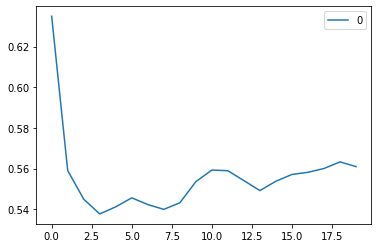

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

KNN with Hypertuning

In [ ]:
hp = {'n_neighbors':np.arange(2,8), 
      'weights': ['uniform', 'distance'], 
      'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
      'p': [1, 2]}

for cv in range(2,7):
    grid = GridSearchCV(regressor, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid.fit(X_train,y_train)
    print(f'score for {cv} fold CV is : {grid.score(X_test,y_test)}')
    print(f'Best result {grid.best_params_}')

KNN_reg = grid.best_estimator_

score for 2 fold CV is : 0.7653235435369807
Best result {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
score for 3 fold CV is : 0.7650789726787679
Best result {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
score for 4 fold CV is : 0.765078972678768
Best result {'algorithm': 'brute', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
score for 5 fold CV is : 0.7650789726787679
Best result {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
score for 6 fold CV is : 0.7660883968298832
Best result {'algorithm': 'brute', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


Best:
- 6 fold CV R2 = 0.7660883968298832
- {'algorithm': 'brute', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

# Decision Trees

In [ ]:
#Creating regressor object
dt = DecisionTreeRegressor()
#Fitting to train data
dt.fit(X_train, y_train)
#Creating predictions based on test
y_pred = dt.predict(X_test)
#printing R2 score
print(f'The R2 for Decision Trees is: {r2_score(y_test, y_pred)}')

The R2 for Decision Trees is: 0.5624122113021346


Decision tree with Hypertuning

In [ ]:
hp = {'criterion':['mse', 'friedman_mse', 'mae'], 
      'max_depth':np.arange(1,25),
      'splitter': ['best', 'random'], 
      'max_features' : ['auto', 'sqrt', 'log2']}

for cv in range(2,7):
    grid = GridSearchCV(regressor, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid.fit(X_train,y_train)
    print(f'score for {cv} fold CV is : {grid.score(X_test,y_test)}')
    print(f'Best result {grid.best_params_}')

score for 2 fold CV is : 0.6664185303508667
Best result {'criterion': 'mae', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}
score for 3 fold CV is : 0.6641659955725221
Best result {'criterion': 'mae', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}
score for 4 fold CV is : 0.6703428413507607
Best result {'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}
score for 5 fold CV is : 0.6484427506111743
Best result {'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}
score for 6 fold CV is : 0.663152916771871
Best result {'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': 'auto', 'splitter': 'random'}


Best: 
- 4 fold CV R2 = 0.6703428413507607
- Best result {'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}



0 feature log_gdp_per_capita 0.7209937373982159
1 feature freedom 0.12962036446969685
2 feature perceptions_of_corruption 0.05689485793789834
3 feature healthy_life_expectancy 0.05589876733357342
4 feature generosity 0.03659227286061544


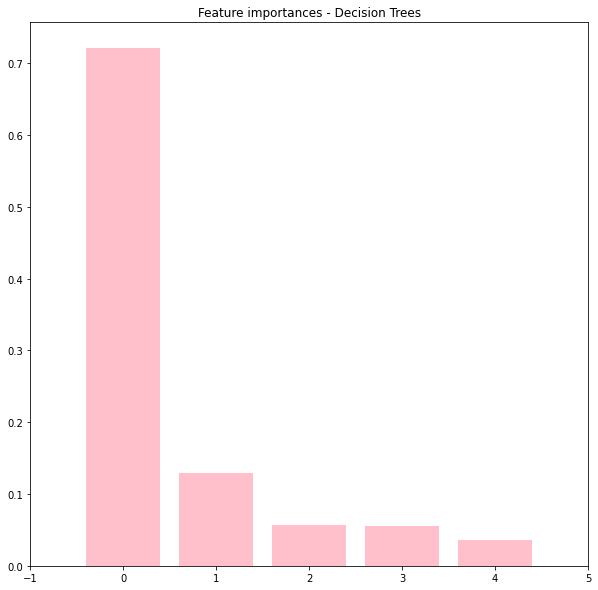

In [ ]:
#Feature importance
dt_reg = grid.best_estimator_
feature_names = list(X_train.columns)

dt_importances = dt_reg.feature_importances_

indices = np.argsort(dt_importances)[::-1]

for f in range(X_train.shape[1]):
    print(f'{f} feature {feature_names[indices[f]]} {dt_importances[indices[f]]}')

#Plotting feature importances
plt.figure(figsize=(10, 10))
plt.title('Feature importances - Decision Trees')
plt.bar(range(X_train.shape[1]), dt_importances[indices],
        color='pink', align='center')
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [ ]:
#Fitting model using the most important feature columns to reduce overfitting
cols = ['log_gdp_per_capita','freedom']
X_train_2features = X_train[cols]
X_test_2features = X_test[cols]

hp = {'criterion':['mse', 'friedman_mse', 'mae'], 
      'max_depth':np.arange(1,20),
      'splitter': ['best', 'random'], 
      'max_features' : ['auto', 'sqrt', 'log2']}

for cv in range(2,7):
    grid2 = GridSearchCV(regressor, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid2.fit(X_train_2features,y_train)
    print(f'score for {cv} fold CV is : {grid2.score(X_test_2features,y_test)}')
    print(f'Best result {grid2.best_params_}')


score for 2 fold CV is : 0.6291409442291764
Best result {'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': 'auto', 'splitter': 'random'}
score for 3 fold CV is : 0.651529778816567
Best result {'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}
score for 4 fold CV is : 0.6571473392991014
Best result {'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 'auto', 'splitter': 'best'}
score for 5 fold CV is : 0.613719032484993
Best result {'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': 'auto', 'splitter': 'random'}
score for 6 fold CV is : 0.6021987817121301
Best result {'criterion': 'mse', 'max_depth': 7, 'max_features': 'auto', 'splitter': 'random'}


Best:
- R2 score for 4 fold CV is : 0.6571473392991014
- {'criterion': 'friedman_mse', 'max_depth': 4, 'max_features': 'auto', 'splitter': 'best'}

In [ ]:
#Creating a model object and fitting
dt =  DecisionTreeRegressor(max_depth=5,max_features='auto').fit(X_train, y_train)
#Creating prediction object for test and train
y_pred_test = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred_test)
#Creating object for the linear coefficients for each feature
print(style.BOLD + f'DT regressor R2 = {r2}' + style.END)


print(f'mean squared error train(MSE): {mean_squared_error(y_train,y_pred_train)}')
print(f'mean squared error test (MSE): {mean_squared_error(y_test,y_pred_test)}')

print(f'root mean squared error train (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')
print(f'root mean squared error test (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')

DT regressor R2 = 0.6703428413507608
mean squared error train(MSE): 0.22927822337734033
mean squared error test (MSE): 0.36869260652496405
root mean squared error train (RMSE): 0.4788300568858855
root mean squared error test (RMSE): 0.4788300568858855


# Random Forest

In [ ]:
#Creating modelling object
rf = RandomForestRegressor()
#Fitting to train
rf.fit(X_train, y_train)
#Predicting
y_pred = rf.predict(X_test)
#printing r2 metric
r2_score(y_test, y_pred)

0.7585809482795317

In [ ]:
rf_rmse_val = [] #to store rmse values for different k
for K in range(90, 120):
    K = K +1
    model = RandomForestRegressor(n_estimators= K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rf_rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  91 is: 0.5152608220317831
RMSE value for k=  92 is: 0.5185743268292603
RMSE value for k=  93 is: 0.5091768829458633
RMSE value for k=  94 is: 0.5263255007931205
RMSE value for k=  95 is: 0.5280147701067077
RMSE value for k=  96 is: 0.5191254677984125
RMSE value for k=  97 is: 0.5222606384261028
RMSE value for k=  98 is: 0.5220908006425765
RMSE value for k=  99 is: 0.5185667542277386
RMSE value for k=  100 is: 0.5191841275482193
RMSE value for k=  101 is: 0.5159129344945295
RMSE value for k=  102 is: 0.5234831841331052
RMSE value for k=  103 is: 0.5197766835281136
RMSE value for k=  104 is: 0.5128562959752928
RMSE value for k=  105 is: 0.5193995751070004
RMSE value for k=  106 is: 0.5171110649923271
RMSE value for k=  107 is: 0.5182658207661759
RMSE value for k=  108 is: 0.5197577508243543
RMSE value for k=  109 is: 0.5168848993937848
RMSE value for k=  110 is: 0.5228087040686794
RMSE value for k=  111 is: 0.5162858745915299
RMSE value for k=  112 is: 0.51432142007774

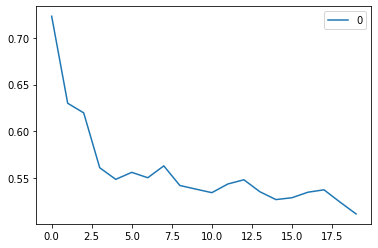

In [ ]:
#plotting the rmse values against k values
rf_curve = pd.DataFrame(rf_rmse_val) #elbow curve 
rf_curve.plot()

Random Forest with Hypertuning

In [ ]:
hp = {'criterion':['mse', 'mae'], 
      'n_estimators':np.arange(90, 120),
      #'max_depth':np.arange(5, 10),
      'warm_start': [True, False], 
      'max_features' : ['auto', 'sqrt', 'log2']}

for cv in range(2,6):
    grid_forest = GridSearchCV(rf, param_grid  = hp  , cv = cv, scoring = make_scorer(r2_score))
    grid_forest.fit(X_train,y_train)
    print(f'score for {cv} fold CV is : {grid_forest.score(X_test,y_test)}')
    print(f'Best result {grid_forest.best_params_}')

score for 2 fold CV is : 0.7686377491496944
Best result {'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 112, 'warm_start': True}
score for 3 fold CV is : 0.7587412179161992
Best result {'criterion': 'mae', 'max_features': 'sqrt', 'n_estimators': 94, 'warm_start': True}
score for 4 fold CV is : 0.7596383538699026
Best result {'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 100, 'warm_start': False}
score for 5 fold CV is : 0.7660218733750743
Best result {'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 111, 'warm_start': True}


Best
- 2 fold CV is R2 = 0.7686377491496944
- {'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 112, 'warm_start': True}

In [ ]:
#Creating a model object and fitting
rf =  RandomForestRegressor(n_estimators=112).fit(X_train, y_train)
#Creating prediction object for test and train
y_pred_test = rf.predict(X_test)
y_pred_train=rf.predict(X_train)
#Creating r2 object to evaluate model performance
r2 = r2_score(y_test, y_pred_test)
#Creating object for the linear coefficients for each feature
print(style.BOLD + f'RF regressor R2 = {r2}' + style.END)


print(f'mean squared error train(MSE): {mean_squared_error(y_train,y_pred_train)}')
print(f'mean squared error test (MSE): {mean_squared_error(y_test,y_pred_test)}')

print(f'root mean squared error train (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')
print(f'root mean squared error test (RMSE): {(mean_squared_error(y_train,y_pred_train)**0.5)}')

RF regressor R2 = 0.7665472446939684
mean squared error train(MSE): 0.03320829561943014
mean squared error test (MSE): 0.26109642274080813
root mean squared error train (RMSE): 0.1822314342242582
root mean squared error test (RMSE): 0.1822314342242582


0 feature log_gdp_per_capita 0.3912664342313642
1 feature healthy_life_expectancy 0.27403624352657735
2 feature freedom 0.16832148122739343
3 feature perceptions_of_corruption 0.103416046730395
4 feature generosity 0.06295979428426986


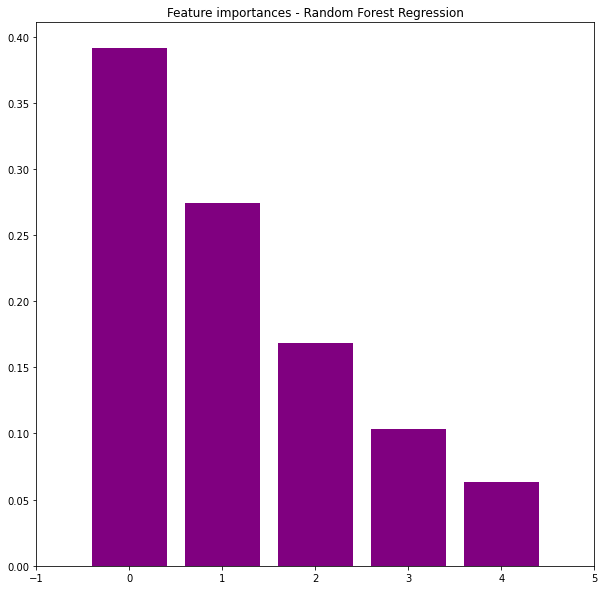

In [ ]:
#Feature importance
rf_reg = grid_forest.best_estimator_
feature_names = list(X_train.columns)

rf_importances = rf_reg.feature_importances_

indices = np.argsort(rf_importances)[::-1]

for f in range(X_train.shape[1]):
    print(f'{f} feature {feature_names[indices[f]]} {rf_importances[indices[f]]}')


plt.figure(figsize=(10, 10))
plt.title('Feature importances - Random Forest Regression')
plt.bar(range(X_train.shape[1]), rf_importances[indices],
        color='purple', align='center')
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Best Model Overall
- The Best Fitting Model is: Random Forest
- 2 fold CV is R2 = 0.7686377491496944
  - criterion': 'mse'
  - 'max_features': 'log2'
  - 'n_estimators': 112, 
  - 'warm_start': True}

Calculate the errors

In [ ]:
rf = RandomForestRegressor(criterion = 'mse', max_features= 'log2', n_estimators= 112, warm_start= True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
errors = (y_test - y_pred)**2

In [ ]:
errors

843    0.051129
370    0.224778
703    0.072098
142    0.743090
139    0.002563
         ...   
126    0.115640
421    0.000152
444    0.005479
853    0.106540
347    0.071924
Name: score, Length: 217, dtype: float64

In [ ]:
tup = zip(y_test, errors)

## Plotting the Errors

Text(0, 0.5, 'cumulated mse')

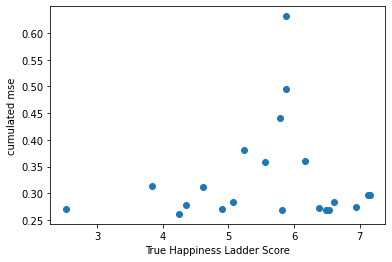

In [ ]:
tup = zip(y_test, errors)
tup = sorted(tup, key=lambda tup: tup[0])
mse = 0
mse_list = list()
for i in range(len(tup)):
  mse = (mse*i + tup[i][1])/(i+1)
  mse_list.append(mse) 
mse_list2 = list()
x = list()
l = y_test.tolist()
for i in range(len(tup)//10):
  mse_list2.append(mse_list[i*10])
for i in range(len(tup)//10):
  x.append(l[i*10])
plt.scatter(x, mse_list2)
plt.xlabel("True Happiness Ladder Score")
plt.ylabel("cumulated mse")

Text(0, 0.5, 'cumulated mse')

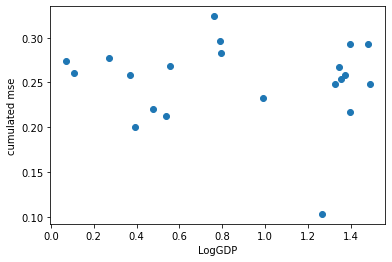

In [ ]:
tup = zip(X_test['log_gdp_per_capita'], errors)
tup = sorted(tup, key=lambda tup: tup[0])
mse = 0
mse_list = list()
for i in range(len(tup)):
  mse = (mse*i + tup[i][1])/(i+1)
  mse_list.append(mse) 
mse_list2 = list()
x = list()
l = X_test['log_gdp_per_capita'].tolist()
for i in range(len(tup)//10):
  mse_list2.append(mse_list[i*10])
for i in range(len(tup)//10):
  x.append(l[i*10])
plt.scatter(x, mse_list2)
plt.xlabel("LogGDP")
plt.ylabel("cumulated mse")

Text(0, 0.5, 'cumulated mse')

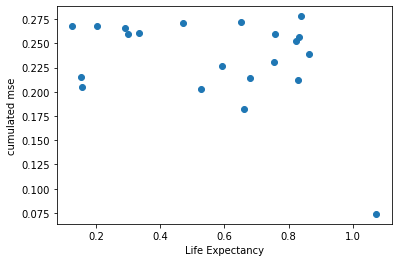

In [ ]:
tup = zip(X_test['healthy_life_expectancy'], errors)
tup = sorted(tup, key=lambda tup: tup[0])
mse = 0
mse_list = list()
for i in range(len(tup)):
  mse = (mse*i + tup[i][1])/(i+1)
  mse_list.append(mse) 
mse_list2 = list()
x = list()
l = X_test['healthy_life_expectancy'].tolist()
for i in range(len(tup)//10):
  mse_list2.append(mse_list[i*10])
for i in range(len(tup)//10):
  x.append(l[i*10])
plt.scatter(x, mse_list2)
plt.xlabel("Life Expectancy")
plt.ylabel("cumulated mse")

Text(0, 0.5, 'cumulated mse')

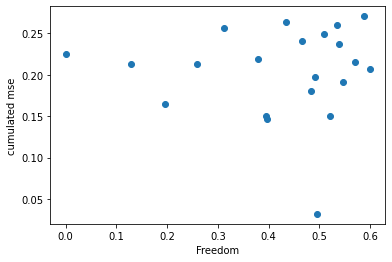

In [ ]:
tup = zip(X_test['freedom'], errors)
tup = sorted(tup, key=lambda tup: tup[0])
mse = 0
mse_list = list()
for i in range(len(tup)):
  mse = (mse*i + tup[i][1])/(i+1)
  mse_list.append(mse) 
mse_list2 = list()
x = list()
l = X_test['freedom'].tolist()
for i in range(len(tup)//10):
  mse_list2.append(mse_list[i*10])
for i in range(len(tup)//10):
  x.append(l[i*10])
plt.scatter(x, mse_list2)
plt.xlabel("Freedom")
plt.ylabel("cumulated mse")